<a href="https://colab.research.google.com/github/MR-Toufigh/Basics-of-intelligent-systems-fall-2024/blob/main/The_second_mini_project_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### McCulloch-Pitts neuron model

#### **Objective of the Code**
The goal of this code is to use a McCulloch-Pitts neuron model to classify points in a 2D space as being either inside or outside a predefined triangle. The triangle is defined by three vertices, and the classification relies on logical operations performed by the neurons.

The McCulloch-Pitts neuron is a simple binary threshold model that outputs either `1` (fire) or `0` (no fire) based on the weighted sum of its inputs. This concept is applied to model the edges of a triangle and determine whether a point lies inside the triangle.

---

#### **Structure of the Code**
1. **Defining the McCulloch-Pitts Neuron:**
   - The neuron takes weights and a threshold as parameters.
   - It computes the weighted sum of its inputs and compares it to the threshold to decide whether to fire.

2. **Defining the Triangle Model:**
   - Each edge of the triangle is represented by a neuron. These neurons use specific weights and thresholds that are derived from the equations of the lines forming the edges of the triangle.
   - A final neuron acts as an "AND gate" to combine the outputs of the edge neurons. This ensures that a point is classified as inside the triangle only if it satisfies all edge conditions.

3. **Generating and Classifying Points:**
   - Random points are generated within a specified range.
   - Each point is checked against the triangle using the defined neurons, and it is classified as inside or outside the triangle.

4. **Plotting and Visualization:**
   - Points are plotted on a 2D graph, with inside points shown in green and outside points in red.
   - The triangle edges and vertices are highlighted for better visualization.
   - The inside region of the triangle is filled with a transparent color for clarity.

5. **Calculating Accuracy:**
   - The accuracy of the model is computed by verifying the correctness of the classifications for all points.

---

#### **How Weights and Biases Are Derived**
The weights and biases for the neurons representing the triangle edges are derived from the equations of the lines forming the edges. The triangle vertices are:
- \( A(1, 0) \)
- \( B(2, 2) \)
- \( C(3, 0) \)

1. **Equation of Line AB:**
   - Using the two-point formula:
     \[
     y - y_1 = \frac{y_2 - y_1}{x_2 - x_1}(x - x_1)
     \]
     Substituting \( A(1, 0) \) and \( B(2, 2) \):
     \[
     y - 0 = 2(x - 1) \implies 2x - y - 2 = 0
     \]
   - Rewrite as \( -2x - y + 6 \geq 0 \). The weights are \([-2, -1]\), and the bias (threshold) is \(-6\).

2. **Equation of Line BC:**
   - Substituting \( B(2, 2) \) and \( C(3, 0) \):
     \[
     y - 2 = -2(x - 2) \implies -2x - y + 6 = 0
     \]
   - Rewrite as \( y \geq 0 \). The weights are \([0, 1]\), and the bias is \(0\).

3. **Equation of Line CA:**
   - Substituting \( C(3, 0) \) and \( A(1, 0) \):
     \[
     y - 0 = \frac{0 - 0}{3 - 1}(x - 3) \implies 2x - y - 2 \geq 0
     \]
   - Rewrite as \( 2x - y + 2 \geq 0 \). The weights are \([2, -1]\), and the bias is \(2\).

4. **Final AND Gate Neuron:**
   - This neuron combines the outputs of the three edge neurons. The weights are \([1, 1, 1]\), and the threshold is \(3\), ensuring that all three edge conditions must be satisfied simultaneously for the point to be inside the triangle.

---

#### **How the Code Works**
1. **Neuron Representation of Edges:**
   - The three edge neurons are used to model the boundaries of the triangle. They check whether a given point satisfies the conditions of each edge.

2. **Classification of Points:**
   - Each point is passed through the neurons, and the final AND gate combines the outputs to determine whether the point lies inside or outside the triangle.

3. **Plotting and Analysis:**
   - Points are visualized on a plot with colors indicating their classification.
   - The triangle is highlighted with its edges and vertices labeled.

4. **Model Evaluation:**
   - The accuracy of the model is computed by comparing the classifications with the expected results.

5. **Output**
- A plot showing the triangle, classified points, and their labels.
- A printed accuracy percentage indicating the correctness of the model.

---

### Code :

In [44]:
#import library
import numpy as np
import itertools

In [45]:
# Define McCulloch-Pitts neuron
class McCullochPittsNeuron:

    def __init__(self, weights, threshold):
        self.weights = weights  # Initialize weights for the neuron
        self.threshold = threshold  # Set the threshold for activation

    def model(self, inputs):
        # Calculate the weighted sum of inputs and compare it to the threshold
        return 1 if self.weights @ inputs >= self.threshold else 0

In [46]:
# Define a function to check if a point is inside a triangle
def check_point_in_triangle(x, y):
    # Define neurons for each edge of the triangle
    neurons = [
        McCullochPittsNeuron([-2, -1], -6),  # Neuron for line AB (edge between vertices A and B)
        McCullochPittsNeuron([0, 1], 0),     # Neuron for line BC (edge between vertices B and C)
        McCullochPittsNeuron([2, -1], 2)     # Neuron for line CA (edge between vertices C and A)
    ]

    # Calculate outputs of the neurons representing the triangle edges
    line_outputs = [neuron.model(np.array([x, y])) for neuron in neurons]

    # Use a final neuron (AND gate) to determine if the point is inside the triangle
    final_neuron = McCullochPittsNeuron([1, 1, 1], 3)  # AND gate combines edge outputs
    final_output = final_neuron.model(np.array(line_outputs))

    return [final_output]  # Return the result as a list to match expected format

In [ ]:
# Generate random data points within a specified range
num_points = 2000  # Number of random points to generate
np.random.seed(13)  # Set random seed for reproducibility
x_random = np.random.uniform(0, 4, num_points)  # Generate random x-coordinates within range [0, 4]
y_random = np.random.uniform(-1, 3, num_points)  # Generate random y-coordinates within range [-1, 3]

In [ ]:
# Classify points based on their location relative to the triangle
outside_points = []  # List to store points outside the triangle
inside_points = []   # List to store points inside the triangle

for i in range(num_points):
    triangle_check = check_point_in_triangle(x_random[i], y_random[i])  # Check classification
    if triangle_check[0] == 0:  # Outside the triangle
        outside_points.append((x_random[i], y_random[i]))  # Add to outside points list
    else:  # Inside the triangle
        inside_points.append((x_random[i], y_random[i]))  # Add to inside points list

# Separate x and y coordinates for plotting purposes
outside_x, outside_y = zip(*outside_points)  # Unpack x and y coordinates of outside points
inside_x, inside_y = zip(*inside_points)    # Unpack x and y coordinates of inside points

In [ ]:
# Calculate model accuracy
actual_inside_points = len(inside_points)  # Total points classified as inside
actual_outside_points = len(outside_points)  # Total points classified as outside
total_points = num_points  # Total number of points

# Count correct classifications for inside and outside points
correct_inside_classification = sum(
    1 for x, y in inside_points if check_point_in_triangle(x, y)[0] == 1  # Correctly classified inside points
)
correct_outside_classification = sum(
    1 for x, y in outside_points if check_point_in_triangle(x, y)[0] == 0  # Correctly classified outside points
)
correct_classifications = correct_inside_classification + correct_outside_classification  # Total correct classifications
accuracy = (correct_classifications / total_points) * 100  # Compute accuracy as a percentage

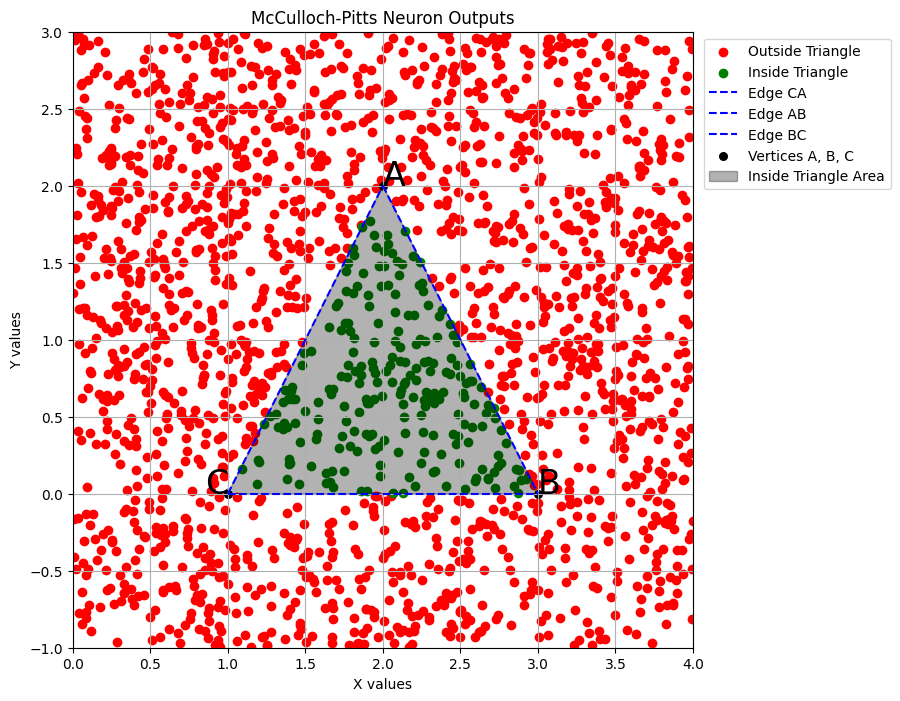


******************************************************

 Accuracy of the model: 100.00% 

******************************************************



In [61]:
# Plotting the results
plt.figure(figsize=(8, 8))  # Set figure size
plt.scatter(outside_x, outside_y, color='red', label='Outside Triangle')  # Plot points outside the triangle in red
plt.scatter(inside_x, inside_y, color='green', label='Inside Triangle')  # Plot points inside the triangle in green
plt.xlabel('X values')  # Label x-axis
plt.ylabel('Y values')  # Label y-axis
plt.title('McCulloch-Pitts Neuron Outputs')  # Set plot title

# Draw the triangle edges for better visualization
plt.plot([1, 2], [0, 2], 'b--', label='Edge CA')  # Edge CA (from vertex C to vertex A)
plt.plot([2, 3], [2, 0], 'b--', label='Edge AB')  # Edge AB (from vertex A to vertex B)
plt.plot([1, 3], [0, 0], 'b--', label='Edge BC')  # Edge BC (from vertex B to vertex C)

# Highlight triangle vertices
plt.scatter([1, 2, 3], [0, 2, 0], color='black', s=30, label='Vertices A, B, C')  # Mark triangle vertices
plt.text(2, 2, 'A', fontsize=24, color='black', ha='left')  # Label vertex A
plt.text(3, 0, 'B', fontsize=24, color='black', ha='left')   # Label vertex B
plt.text(1, 0, 'C', fontsize=24, color='black', ha='right')   # Label vertex C

# Fill the triangle area to indicate the inside region
triangle_x = [1, 2, 3, 1]  # X-coordinates of triangle vertices
triangle_y = [0, 2, 0, 0]  # Y-coordinates of triangle vertices
plt.fill(triangle_x, triangle_y, color='black', alpha=0.3, label='Inside Triangle Area')  # Fill triangle with transparent color

# Set axis limits for better visualization
plt.xlim(0, 4)  # Set x-axis range from 0 to 4
plt.ylim(-1, 3)  # Set y-axis range from -1 to 3

# Add grid and legend to the plot
plt.grid(True)  # Enable grid for better readability
plt.legend(loc='upper right', bbox_to_anchor=(1.33, 1.0))  # Position legend outside the plot area

# Save the plot to a file
plt.savefig('triangle_output_with_filter.png', bbox_inches='tight')  # Save plot as a PNG file

# Display the plot
plt.show()  # Render the plot on the screen

# Print the accuracy of the model
print(f"\n******************************************************\n\n Accuracy of the model: {accuracy:.2f}% \n\n******************************************************\n")  # Output the computed accuracy

### Line-by-Line Explanation

```python
import numpy as np
import matplotlib.pyplot as plt
```
- Import `numpy` for numerical operations and `matplotlib.pyplot` for plotting graphs.

---

```python
# Define McCulloch-Pitts neuron
class McCullochPittsNeuron:

    def __init__(self, weights, threshold):
        self.weights = weights  # Initialize weights for the neuron
        self.threshold = threshold  # Set the threshold for activation
```
- Define a class `McCullochPittsNeuron` that models a single neuron.
- `weights`: Determines how much influence each input has on the neuron's activation.
- `threshold`: Specifies the minimum value of the weighted sum required to activate the neuron.

---

```python
    def model(self, inputs):
        # Calculate the weighted sum of inputs and compare it to the threshold
        return 1 if self.weights @ inputs >= self.threshold else 0
```
- The `model` function computes the weighted sum of the inputs using the `@` operator (matrix multiplication).
- If the weighted sum meets or exceeds the threshold, the neuron "fires" (returns 1); otherwise, it does not (returns 0).

---

```python
# Define a function to check if a point is inside a triangle
def check_point_in_triangle(x, y):
```
- This function uses McCulloch-Pitts neurons to determine if a given point \((x, y)\) lies inside a predefined triangle.

---

```python
    neurons = [
        McCullochPittsNeuron([-2, -1], -6),  # Neuron for line AB
        McCullochPittsNeuron([0, 1], 0),     # Neuron for line BC
        McCullochPittsNeuron([2, -1], 2)     # Neuron for line CA
    ]
```
- Define neurons for each edge of the triangle. Each neuron corresponds to one of the triangle's edges:
  - Edge AB
  - Edge BC
  - Edge CA

---

```python
    line_outputs = [neuron.model(np.array([x, y])) for neuron in neurons]
```
- Compute the output of each neuron for the given point \((x, y)\). The result is a list of 1s and 0s indicating whether the point satisfies the constraints of each edge.

---

```python
    final_neuron = McCullochPittsNeuron([1, 1, 1], 3)  # AND gate
    final_output = final_neuron.model(np.array(line_outputs))
    return [final_output]
```
- Combine the edge outputs using a final "AND gate" neuron.
- If all edge conditions are satisfied (all outputs are 1), the point is inside the triangle.

---

```python
num_points = 2000
np.random.seed(13)
x_random = np.random.uniform(0, 4, num_points)
y_random = np.random.uniform(-1, 3, num_points)
```
- Generate 2000 random points within a specified range for the x and y axes.
- Use a fixed seed to ensure reproducibility.

---

```python
outside_points = []
inside_points = []

for i in range(num_points):
    triangle_check = check_point_in_triangle(x_random[i], y_random[i])
    if triangle_check[0] == 0:
        outside_points.append((x_random[i], y_random[i]))
    else:
        inside_points.append((x_random[i], y_random[i]))
```
- Classify the generated points into two groups: inside or outside the triangle.
- Store points outside the triangle in `outside_points` and points inside in `inside_points`.

---

```python
outside_x, outside_y = zip(*outside_points)
inside_x, inside_y = zip(*inside_points)
```
- Extract x and y coordinates separately for points inside and outside the triangle for plotting.

---

```python
correct_inside_classification = sum(
    1 for x, y in inside_points if check_point_in_triangle(x, y)[0] == 1
)
correct_outside_classification = sum(
    1 for x, y in outside_points if check_point_in_triangle(x, y)[0] == 0
)
accuracy = ((correct_inside_classification + correct_outside_classification) / num_points) * 100
```
- Calculate the total number of correctly classified points (inside and outside) and compute the accuracy as a percentage.

---

```python
plt.figure(figsize=(8, 8))
plt.scatter(outside_x, outside_y, color='red', label='Outside Triangle')
plt.scatter(inside_x, inside_y, color='green', label='Inside Triangle')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')
```
- Plot the classified points. Use red for points outside and green for points inside the triangle.

---

```python
plt.plot([1, 2], [0, 2], 'b--', label='Edge CA')
plt.plot([2, 3], [2, 0], 'b--', label='Edge AB')
plt.plot([1, 3], [0, 0], 'b--', label='Edge BC')
```
- Draw the edges of the triangle for better visualization.

---

```python
plt.scatter([1, 2, 3], [0, 2, 0], color='black', s=30, label='Vertices A, B, C')
plt.text(2, 2, 'A', fontsize=24, color='black', ha='left')
plt.text(3, 0, 'B', fontsize=24, color='black', ha='left')
plt.text(1, 0, 'C', fontsize=24, color='black', ha='right')
```
- Mark and label the vertices of the triangle.

---

```python
plt.fill([1, 2, 3, 1], [0, 2, 0, 0], color='black', alpha=0.3, label='Inside Triangle Area')
plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.33, 1.0))
plt.savefig('triangle_output_with_filter.png', bbox_inches='tight')
plt.show()
```
- Fill the triangle to highlight the inside area and save the plot as a PNG file.

---

```python
print(f"Accuracy of the model: {accuracy:.2f}%")
```
- Print the accuracy of the classification.